<a href="https://colab.research.google.com/github/he16946/Data_Labs/blob/master/Passwords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Password Strength Data

In [0]:
import os
import pandas as pd
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
os.environ['KAGGLE_USERNAME'] = "ce889group3" # username from the json file

os.environ['KAGGLE_KEY'] = "2fec783dbd857229b51562347fd33dfe" # key from the json file

! kaggle datasets download -d bhavikbb/password-strength-classifier-dataset
! unzip -q "password-strength-classifier-dataset.zip"

  0% 0.00/5.01M [00:00<?, ?B/s]
100% 5.01M/5.01M [00:00<00:00, 81.4MB/s]


In [0]:
df = pd.read_csv("data.csv", error_bad_lines=False)
df.shape

## Data is 2 columns, one showing the password, the second showing its strength

In [4]:
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


## Cleaning up data and removing NaNs

In [5]:
df.columns

#check for nans
df.isna().sum() 

password    1
strength    0
dtype: int64

In [6]:
#find and remove nan value
df[df.isnull().any(axis=1)]

,password,strength
367579,NaN,0


In [0]:
df = df.dropna()

## Check for balance of data, classified into medium (74.19%) and other (25.81%)

In [0]:
print('Weak', round(df['strength'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Medium', round(df['strength'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
print('Strong', round(df['strength'].value_counts()[2]/len(df) * 100,2), '% of the dataset')

Weak 13.4 % of the dataset
Medium 74.19 % of the dataset
Strong 12.42 % of the dataset


(array([ 89701.,      0.,      0.,      0.,      0., 496801.,      0.,
             0.,      0.,  83137.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

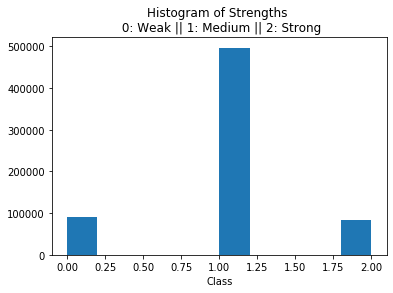

In [8]:
plt.title('Histogram of Strengths \n 0: Weak || 1: Medium || 2: Strong')
plt.xlabel('Class')
plt.hist(df['strength'])

## Extracting features from data (password length, upper-case, lower-case, numbers, special characters) and their correlation with strength 

In [0]:
lengths = df['password'].str.len()

In [0]:
df.insert(2, 'length', lengths)

In [11]:
df.head()

,password,strength,length
0,kzde5577,1,8
1,kino3434,1,8
2,visi7k1yr,1,9
3,megzy123,1,8
4,lamborghin1,1,11


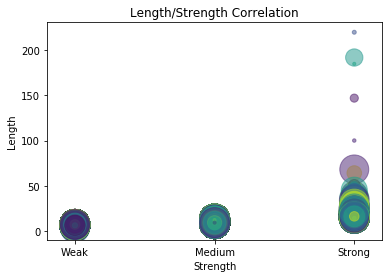

In [12]:
y = df['length']
x = df['strength']
area = (30 * np.random.rand(669639))**2  # 0 to 15 point radii
colors = np.random.rand(669639)
plt.title('Length/Strength Correlation')
plt.xlabel('Strength')
plt.xticks([0,1,2], ['Weak', 'Medium', 'Strong'])
plt.ylabel('Length')
plt.scatter(x,y, s=area, c = colors, alpha = 0.5)

In [13]:
def split(word): 
    return [char for char in word] 

#return number of uppercase characters
def upper_case(word):
  count = 0 
  for x in word:
    for char in x:
     if char.isupper():
        count = count + 1
  return count
  count = 0 

#return number of lowercase characters
def lower_case(word):
  count = 0 
  for x in word:
    for char in x:
     if char.islower():
        count = count + 1
  return count
  count = 0 

#return number of digit characters
def number(word):
  count = 0 
  for x in word:
    for char in x:
     if char.isdigit():
        count = count + 1
  return count
  count = 0 

#return number of all other characters
def spesh(word):
  for x in word:
    return len(word) - (number(word) + lower_case(word) + upper_case(word))

df['upper'] = df['password'].apply(lambda x: upper_case(x))
df['lower'] = df['password'].apply(lambda x: lower_case(x))
df['numbers'] = df['password'].apply(lambda x: number(x))
df['special_characters'] = df['password'].apply(lambda x: spesh(x))
df.head()

,password,strength,length,upper,lower,numbers,special_characters
0,kzde5577,1,8,0,4,4,0
1,kino3434,1,8,0,4,4,0
2,visi7k1yr,1,9,0,7,2,0
3,megzy123,1,8,0,5,3,0
4,lamborghin1,1,11,0,10,1,0


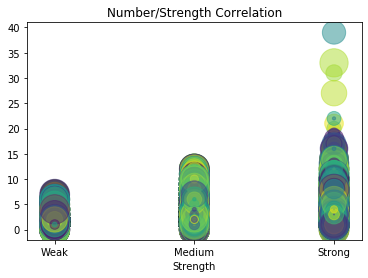

In [14]:
y = df['numbers']
x = df['strength']
area = (30 * np.random.rand(669639))**2  # 0 to 15 point radii
colors = np.random.rand(669639)
plt.title('Number/Strength Correlation')
plt.xticks([0,1,2], ['Weak', 'Medium', 'Strong'])
plt.xlabel('Strength')
plt.scatter(x,y, s=area, c = colors, alpha = 0.5)

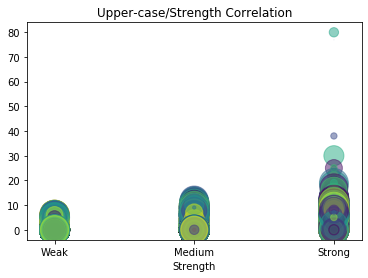

In [15]:
y = df['upper']
x = df['strength']
area = (30 * np.random.rand(669639))**2  # 0 to 15 point radii
colors = np.random.rand(669639)
plt.title('Upper-case/Strength Correlation')
plt.xticks([0,1,2], ['Weak', 'Medium', 'Strong'])
plt.xlabel('Strength')
plt.scatter(x,y, s=area, c = colors, alpha=0.5)

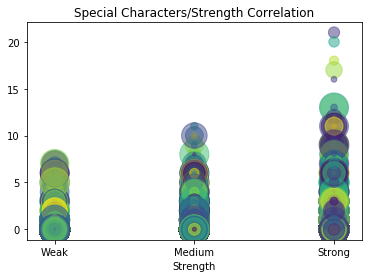

In [16]:
y = df['special_characters']
x = df['strength']
area = (30 * np.random.rand(669639))**2  # 0 to 15 point radii
colors = np.random.rand(669639)
plt.title('Special Characters/Strength Correlation')
plt.xticks([0,1,2], ['Weak', 'Medium', 'Strong'])
plt.xlabel('Strength')
plt.scatter(x,y, s=area, c = colors, alpha = 0.5)

[[ 1.          0.8368168   0.62051229  0.1754692   0.15476485  0.2261018 ]
 [ 0.8368168   1.          0.667152    0.16856542  0.22485964  0.37049805]
 [ 0.62051229  0.667152    1.         -0.08135082  0.00706055 -0.1023082 ]
 [ 0.1754692   0.16856542 -0.08135082  1.          0.02323103 -0.56656363]
 [ 0.15476485  0.22485964  0.00706055  0.02323103  1.          0.09734554]
 [ 0.2261018   0.37049805 -0.1023082  -0.56656363  0.09734554  1.        ]]


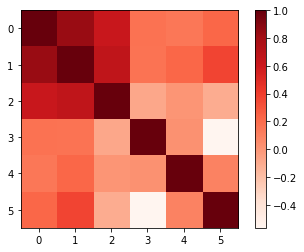

In [17]:
corrmatrix = np.corrcoef([df['strength'], df['length'], df['upper'], df['numbers'] ,df['special_characters'], df['lower']])
print(corrmatrix)
# Plot corr matrix as image
plt.imshow(corrmatrix, cmap='Reds')
plt.colorbar()